# **Initial Graphs - ACLR Final Project**
#### Group: Elaine, Rachel, Yuthi

**Graph 1:**

Planning on creating a scatterplot showing how both physical and mental readiness affect each other and the individual's overall confidence in returning to play.

In [27]:
# Environment Setup:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
from matplotlib import font_manager

In [28]:
# importing data as dataframe:
df = pd.read_csv('aclr data(in).csv')

# filtering df to be consistent with relevant variables of interest:
df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi', 'tegner_pre', 'tegner_now', 'lsi_ext_isok_60', 'lsi_flex_isok_60', 'tss_dashboard']]
# previewing df with relevant columns:
df.head()

,sex_dashboard,graft_dashboard2,reinjury,age,height_m,mass_kg,bmi,ikdc,acl_rsi,tegner_pre,tegner_now,lsi_ext_isok_60,lsi_flex_isok_60,tss_dashboard
0,Male,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,No,21.7,1.9,87.4,24.210526,95.4,87.5,9.0,9.0,87.86,103.32,13 to 24 months
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,HS autograft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,No,14.5,1.6,72.2,28.203125,79.3,8.3,8.0,5.0,45.00,72.98,5 to 7 months


In [29]:
# Filtering for numeric columns:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# imputing missing values with the mean for each respective column
mean_values = df[numeric_columns].mean()
m_df = df.fillna(mean_values)

# previewing the imputed dataframe:
print(m_df.head(5))

  sex_dashboard graft_dashboard2 reinjury        age  height_m    mass_kg  \
0          Male            Other      NaN  20.184761  1.725412  74.343033   
1           NaN              NaN       No  21.700000  1.900000  87.400000   
2           NaN              NaN      NaN  20.184761  1.725412  74.343033   
3        Female     HS autograft      NaN  20.184761  1.725412  74.343033   
4           NaN              NaN       No  14.500000  1.600000  72.200000   

         bmi       ikdc    acl_rsi  tegner_pre  tegner_now  lsi_ext_isok_60  \
0  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
1  24.210526  95.400000  87.500000    9.000000    9.000000        87.860000   
2  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
3  25.201579  78.457377  64.929381    8.363162    5.838621        73.194083   
4  28.203125  79.300000   8.300000    8.000000    5.000000        45.000000   

   lsi_flex_isok_60    tss_dashboard  
0         89.728019    

In [30]:
df['sex_dashboard'] = df['sex_dashboard'].shift(-1)

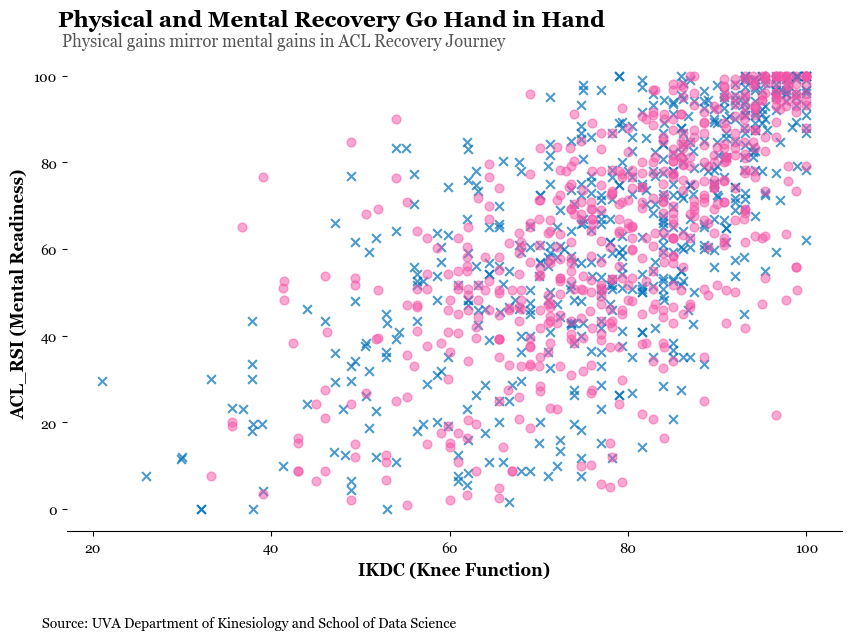

In [31]:
# == PLOT PREPARATION ==

# data for graphing (getting rid of NaN values):
df_clean = df[['ikdc', 'acl_rsi', 'sex_dashboard', 'tss_dashboard']].dropna()

# Filter by sex
df_male = df_clean[df_clean['sex_dashboard'] == 'Male']
df_female = df_clean[df_clean['sex_dashboard'] == 'Female']

# == PLOT ==

# setting plot size:
plt.figure(figsize=(10, 6))
# male graph:
plt.scatter(df_male['ikdc'], df_male['acl_rsi'], 
            marker='x', label='Male', color='#0070BB', alpha=0.7, s=40)
# Plot females with square markers
plt.scatter(df_female['ikdc'], df_female['acl_rsi'], 
            marker='o', label='Female', color='#F653A6', alpha=0.5, s=40)



# == SCAFFOLDING == 

# setting titles:
plt.suptitle('Physical and Mental Recovery Go Hand in Hand', weight = 'bold', fontsize = 16, x = 0.39)
plt.title('Physical gains mirror mental gains in ACL Recovery Journey', color='#585757', fontsize = 12, x = 0.28)
plt.subplots_adjust(top = 0.905) # adjusting spacing between sub and main title


# setting x-axis and y-axis labels:
plt.xlabel('IKDC (Knee Function)', weight = 'bold', fontsize = 12)
plt.ylabel('ACL_RSI (Mental Readiness)', weight = 'bold', fontsize = 12)

# reducing clutter on the end of the x-axis:
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.locator_params(axis='x', nbins=8)  # reduces x-axis ticks

# extra formatting (removing spines for cleaner look):
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


# adding source as annotation:
plt.figtext(0.1, -0.05, 'Source: UVA Department of Kinesiology and School of Data Science', ha='left', fontsize=10)


plt.show()

**Graph 2:**

Planning on creating a scatterplot showing how both physical and mental readiness affect each other and the individual's overall confidence in returning to play.

Proportion of patients with no reinjury: 87.47%
   graft_dashboard2       reinjury  count  proportion
0         Allograft           Both      1    0.009174
1         Allograft  Contralateral      3    0.027523
2         Allograft    Ipsilateral     15    0.137615
3         Allograft             No     90    0.825688
4     BTB autograft  Contralateral     14    0.071066
5     BTB autograft    Ipsilateral      7    0.035533
6     BTB autograft             No    176    0.893401
7      HS autograft  Contralateral     10    0.048544
8      HS autograft    Ipsilateral      7    0.033981
9      HS autograft             No    189    0.917476
10            Other  Contralateral     12    0.100840
11            Other    Ipsilateral      7    0.058824
12            Other             No    100    0.840336
13     QT autograft  Contralateral      8    0.067797
14     QT autograft    Ipsilateral      7    0.059322
15     QT autograft             No    103    0.872881
No reinjury proportions by Graft t

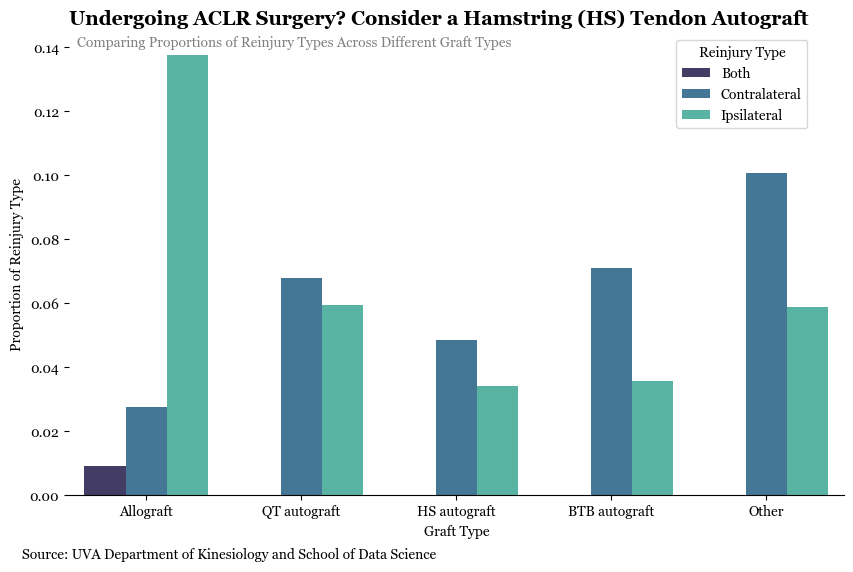

In [32]:
# setting font
georgia_font = font_manager.FontProperties(family='Georgia')
plt.rcParams['font.family'] = georgia_font.get_name()

df = df[['sex_dashboard', 'graft_dashboard2', 'reinjury', 'age', 'height_m', 'mass_kg', 'bmi', 'ikdc', 'acl_rsi']]
df = df[df['reinjury'].str.upper() != 'BLANK'] #get rid of all blank in reinjury

prop_noreinjury = df['reinjury'].value_counts(normalize=True).get('No', 0) #get proportion of no reinjury
print(f"Proportion of patients with no reinjury: {prop_noreinjury:.2%}") #print proportion

df['reinjury_shifted'] = df['reinjury'].shift(-1) #align reinjury with other values
df_cleaned = df[df['graft_dashboard2'].notna()][['graft_dashboard2', 'reinjury_shifted']] #get rid of na
df_cleaned.columns = ['graft_dashboard2', 'reinjury'] #rename

counts = ( #get counts of graft and reinjury
    df_cleaned.groupby(['graft_dashboard2', 'reinjury'])
    .size()
    .reset_index(name='count')
)

graft_order = ['Allograft', 'QT autograft', 'HS autograft', 'BTB autograft', 'Other'] #order
counts['graft_dashboard2'] = pd.Categorical( #set order in counts
    counts['graft_dashboard2'],
    categories=graft_order,
    ordered=True
)
total_per_graft = counts.groupby('graft_dashboard2')['count'].transform('sum') #get sums
counts['proportion'] = counts['count'] / total_per_graft #calculate proportions
#show proportions
print(counts)
print('No reinjury proportions by Graft type:\n' +
'Allograft: 0.83\n' +
'BTB autograft: 0.89\n' +
'HS autograft: 0.92\n' +
'QT autograft: 0.87\n' +   
'Other: 0.84\n')

counts_noreinjury = counts[counts['reinjury'] != 'No'] #get rid of no reinjury bar
plt.figure(figsize=(10, 6))
sns.barplot( #make grouped barplot
    data=counts_noreinjury,
    x='graft_dashboard2',
    y='proportion',
    hue='reinjury',
    palette='mako'
)
plt.xlabel('Graft Type')
plt.ylabel('Proportion of Reinjury Type')
plt.title('Undergoing ACLR Surgery? Consider a Hamstring (HS) Tendon Autograft', fontsize=14, weight='bold', loc='left')  # Main title
plt.text(0.01, 0.98, 'Comparing Proportions of Reinjury Types Across Different Graft Types', 
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=10, color='gray')  # Subtitle
plt.legend(title='Reinjury Type', loc='upper left', bbox_to_anchor=(0.775, 1.0))
plt.text(-0.8, -0.02, 'Source: UVA Department of Kinesiology and School of Data Science', ha='left', fontsize=10)

sns.despine(top=True, right=True, left=True) #get rid of axes
plt.show()

**Graph 3**: Looking at the relationship between different reinjuries between the sexes.

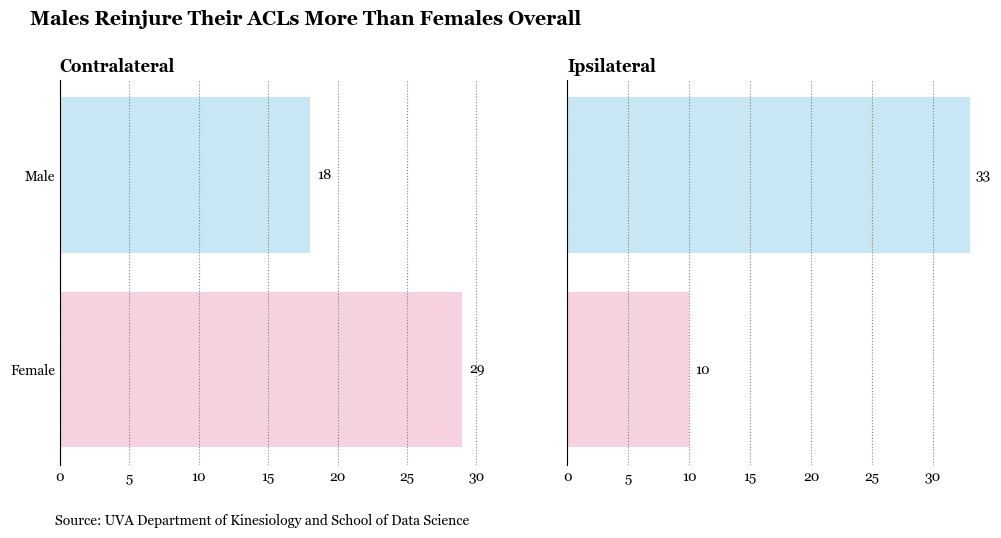

In [33]:
# small multiples bar chart

# Set font family to Georgia
georgia_font = font_manager.FontProperties(family='Georgia')
plt.rcParams['font.family'] = georgia_font.get_name()

# Records were mismatched so we shifted row values by 1 
# (for every graft_type recorded, reinjury was blank so shifted by 1 to match)
m_df['reinjury_shifted'] = m_df['reinjury'].shift(-1)
df2 = m_df[m_df['sex_dashboard'].notna()][['sex_dashboard', 'reinjury_shifted']]
df2.columns = ['sex_dashboard', 'reinjury']
# print(df2.head()) # previewing cleaned dataset

df2 = df2[
    (df2['reinjury'].str.upper() != 'BLANK') &
    (df2['sex_dashboard'].str.upper() != 'BLANK')]

df2 = df2[df2['reinjury'].str.upper() != 'NO'] # dropping 'no' reinjury records
df2= df2[df2['reinjury'].str.upper() != 'BOTH'] # dropping 'both' reinjury records


grouped_counts2 = (
    df2.groupby(['sex_dashboard', 'reinjury'])
    .size()
    .reset_index(name='count')
)


# Create sub-dataframes for Contralateral and Ipsilateral
df_contra = grouped_counts2[grouped_counts2['reinjury'] == 'Contralateral']
df_ipsi = grouped_counts2[grouped_counts2['reinjury'] == 'Ipsilateral']

# Set up 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Title
fig.suptitle('Males Reinjure Their ACLs More Than Females Overall', fontsize=14, weight='bold', x=0.1, ha='left', y=1.02)

# Contralateral subplot
colors_contra = df_contra['sex_dashboard'].map({'Male': '#C8E7F5', 'Female': '#F6D2E0'})  # blue and pink
bars_contra = axs[0].barh(df_contra['sex_dashboard'], df_contra['count'], color=colors_contra)
axs[0].set_title('Contralateral', loc='left', weight='bold', color='black')
axs[0].grid(axis='x', linestyle=':', color='gray')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', length=0)
axs[0].tick_params(axis='y', length=0)

for bar in bars_contra:
    xval = bar.get_width()
    axs[0].text(xval + 0.5, bar.get_y() + bar.get_height()/2,
                round(xval), va='center', ha='left', fontsize=10)

# Ipsilateral subplot
colors_ipsi = df_ipsi['sex_dashboard'].map({'Male': '#C8E7F5', 'Female': '#F6D2E0'})
bars_ipsi = axs[1].barh(df_ipsi['sex_dashboard'], df_ipsi['count'], color=colors_ipsi)
axs[1].set_title('Ipsilateral', loc='left', weight='bold', color='black')
axs[1].grid(axis='x', linestyle=':', color='gray')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].tick_params(axis='x', length=0)
axs[1].tick_params(axis='y', length=0)

for bar in bars_ipsi:
    xval = bar.get_width()
    axs[1].text(xval + 0.5, bar.get_y() + bar.get_height()/2,
                round(xval), va='center', ha='left', fontsize=10)

# Final layout
plt.text(-42, -0.8, 'Source: UVA Department of Kinesiology and School of Data Science', ha='left', fontsize=10)
# plt.tight_layout()
plt.show()